# Library

In [ ]:
!pip install -q pyLDAvis==2.1.2 #per far andare pyLDAvis.gensim

     |████████████████████████████████| 1.6 MB 11.2 MB/s 


In [ ]:
# Importing modules
import pandas as pd
import os
import re
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud

# Don't print warnings
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
#import pyLDAvis.gensim
pyLDAvis.enable_notebook()
#preprocessing

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')
STOPWORDS = set(stopwords.words('english'))
PUNCTUATIONS = string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!pip install pyLDAvis
#!pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


# Dataset Iniziale

In [ ]:
df = pd.read_csv('articles.csv', sep='|')
df

# Preprocessing

In [ ]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])


def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))
    return text.translate(trans)


def remove_emoji(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002500-\U00002BEF"  # chinese char
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"  # dingbats
                              u"\u3030"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_whitespaces(text):
    return " ".join(text.split()).strip()

contractions_dict = { "ain't": "are not", "'s":" is", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "‘cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", 
                     "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", 
                     "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
                     "so've": "so have", "that'd": "that would", "that'd've": "that would have", "there'd": "there would", "there'd've": "there would have", "they'd": "they would", "they'd've": "they would have","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                     "weren't": "were not","what'll": "what will", "what'll've": "what will have", "what're": "what are", "what've": "what have", "when've": "when have", "where'd": "where did", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who've": "who have", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                     "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

def text_normalization(col):
    col = col.fillna('missing')
    col = col.str.lower()
    col = col.str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', regex=True) # remove links
    col = col.apply(lambda x: expand_contractions(x))
    col = col.apply(lambda x: remove_stopwords(x))
    col = col.apply(lambda x: remove_emoji(x))
    col = col.apply(lambda x: remove_punctuation(x))
    col = col.apply(lambda x: remove_whitespaces(x))
    return col

def text_lemmatize(sentence, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in sentence]

<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<input>:54: DeprecationWarning: invalid escape sequence \/
<ipython-input-7-597d8a23e434>:54: DeprecationWarning: invalid escape sequence \/
  col = col.str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', regex=True) # remove links


In [ ]:
#df['text'] = text_normalization(df['text'])
df.head()

# tokenization
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

# lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: text_lemmatize(x, lemmatizer))

df.head()

+ elimino sorgente iniziale e vari punti 

In [ ]:
#save
df.to_csv("preprocessed_articles.csv", index=False,sep="|")

# Lettura CSV preprocessed

In [ ]:
#preprocessed articles sistemato con aggiunta di rimozione

In [ ]:
def read_preprocessed(filename):
  df = pd.read_csv(filename, sep='|')
  df['text'] = df['text'].apply(lambda x: x[1:-1].replace('\'', '').split(', '))
  return df

In [ ]:
df=read_preprocessed("/content/gdrive/MyDrive/UNI/TextMining/preprocessed_articles.csv")
df

,text
0,"[official, hour, announcing, belief, military,..."
1,"[usain, bolt, rounded, world, championship, su..."
2,"[kansa, city, missouri, general, service, admi..."
3,"[los, angeles, medical, doctor, vancouver, bri..."
4,"[police, arrested, another, teen, thursday, si..."
...,...
92574,"[washington, second, grand, jury, decision, in..."
92575,"[los, angeles, california, gov, jerry, brown, ..."
92576,"[norfolk, virginia, second, mate, houston, exp..."
92577,"[tired, counting, sheep, try, one, remedy, get..."


# Topic modeling SKLEARN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# metto assieme le parole per ogni testo (articolo)
df["text"] = [' '.join(d) for d in list(df.text)]
df

,text
0,official hour announcing belief military actio...
1,usain bolt rounded world championship sunday c...
2,kansa city missouri general service administra...
3,los angeles medical doctor vancouver british c...
4,police arrested another teen thursday sixth su...
...,...
92574,washington second grand jury decision indict w...
92575,los angeles california gov jerry brown seek im...
92576,norfolk virginia second mate houston express p...
92577,tired counting sheep try one remedy get good n...


document representation

In [ ]:
docs=df.text

In [ ]:
tf_vectorizer = CountVectorizer(min_df=5, max_df=0.5, stop_words='english',
                                token_pattern=r'\b[a-zA-Z]{3,}\b')
dtm_tf = tf_vectorizer.fit_transform(docs)
dtm_tf.shape

#CountVectorizer converts a collection of text documents to a matrix which contains all the token counts. Sometimes, token count is referred to as term frequency.
#Unlike CountVectorizer, TfidfVectorizer converts documents to a matrix of TF-IDF features. The end result is akin to processing via CountVectorizer followed by TfidfTransformer.

(92579, 65689)

fit LDA model

In [ ]:
#lento (GIA fittato)
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)#10 cluster
lda_tf.fit(dtm_tf)

save model


In [ ]:
#GIA salvato
import joblib

joblib.dump(lda_tf, '/content/gdrive/MyDrive/UNI/TextMining/lda_model_sklearn_10.jl')


load Model

In [ ]:
import joblib
lda_model_sklearn = joblib.load('/content/gdrive/MyDrive/UNI/TextMining/lda_model_sklearn_10.jl')

Visualize

In [ ]:
pyLDAvis.sklearn.prepare(lda_model_sklearn, dtm_tf, tf_vectorizer, mds='tsne',sort_topics=False)

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1   9.938087
1       0.648955  71.707100       2        1  17.386972
2      71.019684   9.971006       3        1   9.348153
3       3.785981  33.185135       4        1   8.487521
4     -42.666500  -9.222070       5        1   8.330047
5      -3.621689 -43.526516       6        1  12.875786
6      -3.632402  -4.171708       7        1   8.420748
7     -36.584400  35.804413       8        1   6.811520
8      44.391380  50.615383       9        1   9.336596
9      40.235809 -31.591665      10        1   9.064572, topic_info=             Term          Freq         Total Category  logprob  loglift
44683      police  74389.000000  74389.000000  Default  30.0000  30.0000
40903       obama  56633.000000  56633.000000  Default  29.0000  29.0000
45456   president  76463.000000  76463.000000  Default  28.0000  28.0000
64496       world  83398.000000  83398.000000  Default  27.0000  27.0000
23695  government  73318.000000  73318.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
45110       power   9427.719077  26279.628386  Topic10  -5.6766   1.3757
64496       world  13348.765754  83398.387281  Topic10  -5.3289   0.5686
49435       right  10748.781784  61562.148930  Topic10  -5.5455   0.6555
37341    military   9210.109671  34019.779913  Topic10  -5.7000   1.0942
63156         war   8841.819395  31086.669635  Topic10  -5.7408   1.1435

[937 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
148        7  0.996623     abedin
421        1  0.160431  according
421        2  0.043725  according
421        3  0.067984  according
421        4  0.146327  according
...      ...       ...        ...
65454      3  0.986801    zelizer
65454      7  0.011961    zelizer
65552      2  0.004199  zimmerman
65552      7  0.002239  zimmerman
65552      9  0.993208  zimmerman

[4067 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Topic 0: 
attack government force official group military security killed cnn syria iraq state flight country plane united report pakistan isi afghanistan war syrian according international told qaeda terrorist airline air troop 



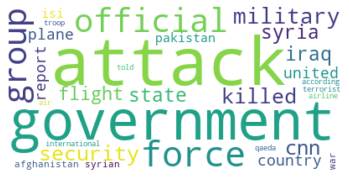

Topic 1: 
like life know day family think thing woman cnn way story film make really child want going friend love work old movie good book best world got man star come 



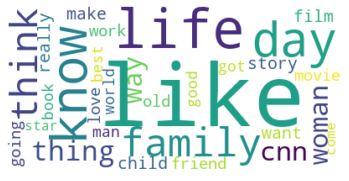

Topic 2: 
obama president million house american state republican government job plan tax money health need romney country clinton billion economy oil make percent democrat economic care work congress business campaign company 



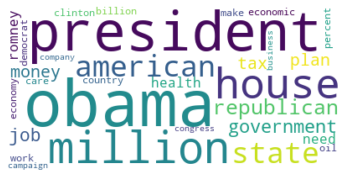

Topic 3: 
police city home cnn told officer area authority according official storm league county minute state car day sunday saturday goal reported mile monday man old tuesday night report resident friday 



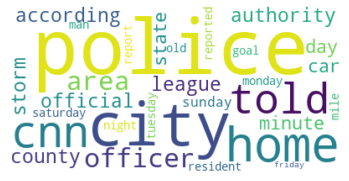

Topic 4: 
world team game player win second match cup season final champion sport race title old play football set day club tour place london victory best point open tournament event city 



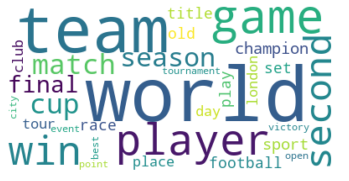

Topic 5: 
company like world make food water use site way day technology space user work million need study product phone used according help high apple facebook google data disease service research 



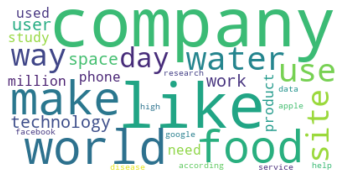

Topic 6: 
state law student right school president american republican court cnn issue woman group vote obama party news marriage political white gay national university public house sex decision justice election campaign 



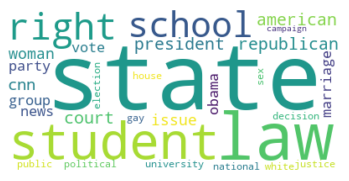

Topic 7: 
child drug state family north woman hospital health report korea doctor medical jackson told according death official cnn case patient korean care united day south month statement week mexico mother 



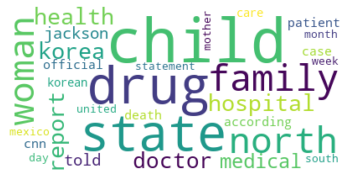

Topic 8: 
police court case charge told attorney death according authority prosecutor crime report prison cnn investigation trial judge murder law statement victim arrested state charged evidence lawyer family man gun criminal 



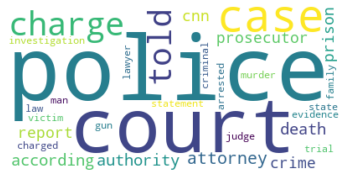

Topic 9: 
country government china president state minister leader russia political united world israel iran party russian chinese international protest right election nation israeli power military prime war foreign protester ukraine egypt 



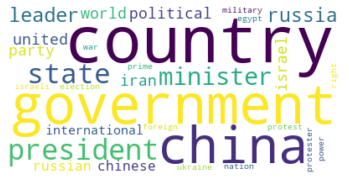

In [ ]:
# most important words for each topic
vocab = tf_vectorizer.get_feature_names()

for i, comp in enumerate(lda_model_sklearn.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:30]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
        
        
    print("\n")
    wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
    wordcloud.generate_from_frequencies(dict(sorted_words))
    #wordcloud.to_image()
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
dict(sorted_words)

{'attack': 26840.396684630294,
 'cnn': 16794.12279529693,
 'force': 21589.88504746337,
 'government': 22521.608748774404,
 'group': 20641.684501857035,
 'killed': 18331.553358084777,
 'military': 19122.770931383773,
 'official': 21049.900415480108,
 'security': 19030.01132790866,
 'syria': 15701.013172405912}